Analyzing the playstore data to see what factors affect apps' ratings.

In [154]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('googleplaystore.csv')

In [156]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [157]:
#Remove un-meaningful value
df = df[df['Last Updated'] != '1.0.19']

In [158]:
#Convert date to a datetime format to calculate difference
df['formated_last_updated'] = df['Last Updated'].apply(lambda row: datetime.datetime.strptime(row, "%B %d, %Y"))

In [159]:
#find the latest date of update
latest_day_of_update =  max(df.formated_last_updated)

In [160]:
#find the oldest date of update
oldest_day_of_update =  min(df.formated_last_updated)
oldest_day_of_update

Timestamp('2010-05-21 00:00:00')

In [161]:
max(df['formated_last_updated'].apply(lambda row: abs((row - oldest_day_of_update).days)))

3001

In [162]:
#find the number of days between the latest date and all update dates
df['days_since_last_update'] = df['formated_last_updated'].apply(lambda row: abs((row - latest_day_of_update).days))

In [163]:
df.days_since_last_update

0         213
1         205
2           7
3          61
4          49
5         500
6         104
7          55
8         322
9          36
10        285
11          8
12        128
13         43
14          5
15         63
16          8
17        274
18          5
19          9
20        110
21        141
22         27
23        154
24         32
25        105
26        301
27        140
28         27
29        351
         ... 
10811      15
10812      56
10813      22
10814    1162
10815      20
10816       2
10817    1013
10818     811
10819     368
10820      42
10821      71
10822     250
10823     108
10824       8
10825     187
10826     138
10827      56
10828     450
10829     780
10830    1661
10831      56
10832    1634
10833    1599
10834     416
10835     678
10836     379
10837      33
10838     565
10839    1297
10840      14
Name: days_since_last_update, Length: 10840, dtype: int64

In [164]:
#Create three bins for dates of update
bins = pd.IntervalIndex.from_tuples([(0,100),(100,400), (400,3001)])
df['grouped_updates'] = pd.cut(df.days_since_last_update, bins, labels = ['recently_updated', 'updated_within_a_year','more_than_a_year_since_update'])

In [165]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'formated_last_updated', 'days_since_last_update',
       'grouped_updates'],
      dtype='object')

In [196]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [166]:
#Take mean of Ratings for each group
df_avgRating = df.groupby(['grouped_updates'], as_index=False).mean()

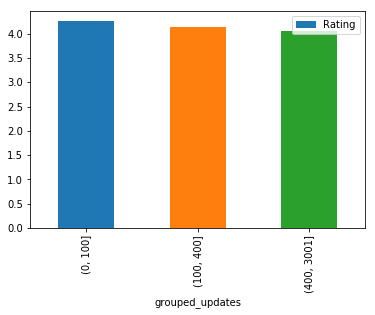

In [168]:
#Create a bar plot of Average rating and date of update
df_avgRating.plot(kind = 'bar', x = 'grouped_updates', y = 'Rating')

Text(0,0.5,'Average Rating')

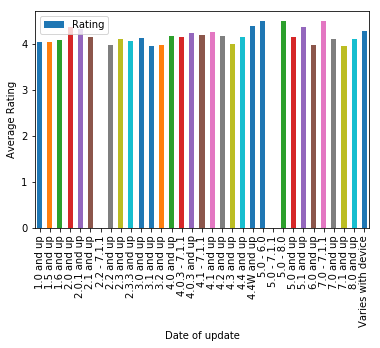

In [195]:
df_avgRatingAndroidVer = df.groupby(['Android Ver'], as_index=False).mean()
df_avgRatingAndroidVer.plot(kind = 'bar', x = 'Android Ver', y = 'Rating')
plt.xlabel('Date of update')
plt.ylabel('Average Rating')

Text(0,0.5,'Average Rating')

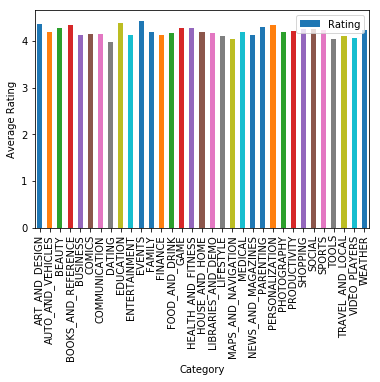

In [194]:
df_avgRatingGrouped = df.groupby(['Category'], as_index=False).mean()
df_avgRatingGrouped.plot(kind = 'bar', x = 'Category', y = 'Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')

Text(0,0.5,'Average Rating')

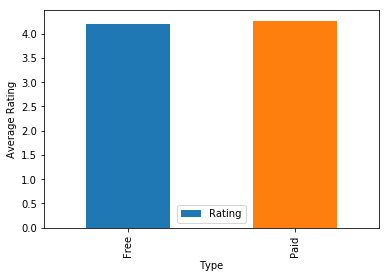

In [193]:
df_avgRatingGrouped = df.groupby(['Type'], as_index=False).mean()
df_avgRatingGrouped.plot(kind = 'bar', x = 'Type', y = 'Rating')
plt.xlabel('Type')
plt.ylabel('Average Rating')

Text(0,0.5,'Average Rating')

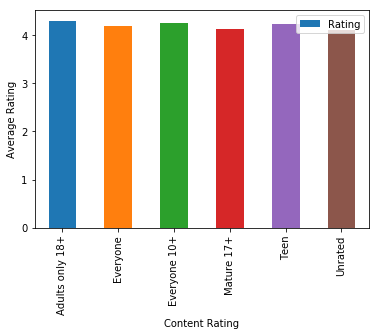

In [192]:
df_avgRatingGrouped = df.groupby(['Content Rating'], as_index=False).mean()
df_avgRatingGrouped.plot(kind = 'bar', x = 'Content Rating', y = 'Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')

Text(0,0.5,'Average Rating')

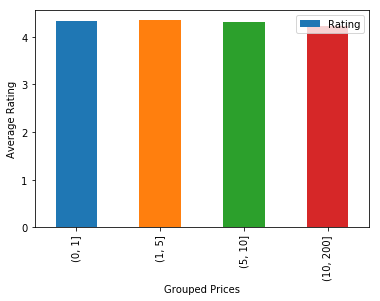

In [191]:
bins = pd.IntervalIndex.from_tuples([(0,1),(1,5), (5,10),(10,200)])
df['grouped_prices'] = pd.cut(df.days_since_last_update, bins)
df_avgRatingGrouped = df.groupby(['grouped_prices'], as_index=False).mean()
df_avgRatingGrouped.plot(kind = 'bar', x = 'grouped_prices', y = 'Rating')
plt.xlabel('Grouped Prices')
plt.ylabel('Average Rating')

Text(0,0.5,'Average Rating')

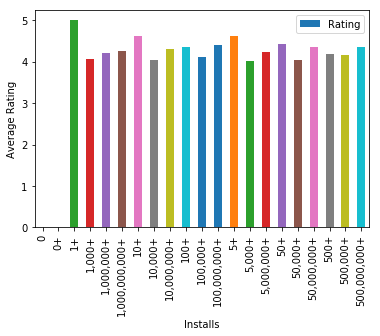

In [197]:
df_avgRatingGrouped = df.groupby(['Installs'], as_index=False).mean()
df_avgRatingGrouped.plot(kind = 'bar', x = 'Installs', y = 'Rating')
plt.xlabel('Installs')
plt.ylabel('Average Rating')